In [4]:
# Nos descargamos las librerías.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_combined_graphs,plot_categorical_numerical_relationship,bubble_plot,grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

In [5]:
# Cargamos la base de datos ya tratada.
df_final = pd.read_csv("./data/final.csv")

In [6]:
# Le cambiamos el nombre para trabajar con facilidad.
df = df_final
df.describe()
# Vemos que los datos están bien.

,host_id,id,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,reviews_per_month
count,2.777800e+04,2.777800e+04,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000,27778.000000
mean,1.939038e+08,4.475765e+17,96.786706,92.952501,125.590287,38.880820,0.398164,5.119807,1.827542,2.398538,3.427440,216.010044,4.110447,618.318813,31.661351,9.051336,0.913817,4.674861,1.130508
std,1.804302e+08,4.799806e+17,11.168706,16.508416,295.958485,1.261934,3.103229,2.362306,1.096204,1.380191,2.269827,154.238124,10.232044,458.277418,61.355229,14.985371,1.654606,0.360921,1.253032
min,5.947000e+03,4.815400e+04,0.000000,0.000000,1.000000,36.646012,-4.584345,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,4.505790e+07,2.871176e+07,98.000000,94.000000,2.000000,36.773368,-4.344391,4.000000,1.000000,1.000000,2.000000,115.000000,1.000000,310.250000,1.000000,0.000000,0.000000,4.630000,0.320000
50%,1.231603e+08,5.353893e+07,100.000000,99.000000,10.000000,39.474137,2.590020,4.000000,1.500000,2.000000,3.000000,165.000000,2.000000,365.000000,9.000000,3.000000,0.000000,4.680000,0.970000
75%,3.241801e+08,9.339270e+17,100.000000,100.000000,91.000000,39.708475,3.074698,6.000000,2.000000,3.000000,5.000000,263.000000,4.000000,1125.000000,33.000000,11.000000,1.000000,4.900000,1.160000
max,5.862899e+08,1.189593e+18,100.000000,100.000000,5304.000000,39.921540,3.474510,16.000000,16.500000,25.000000,50.000000,999.000000,500.000000,1125.000000,1665.000000,660.000000,78.000000,5.000000,45.000000


In [ ]:
# Vemos las variables de que disponemos y el tipo de variable que son.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27778 entries, 0 to 27777
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 27778 non-null  int64  
 1   id                      27778 non-null  int64  
 2   host_response_time      27778 non-null  object 
 3   host_response_rate      27778 non-null  float64
 4   host_acceptance_rate    27778 non-null  float64
 5   host_is_superhost       27778 non-null  object 
 6   host_listings_count     27778 non-null  int64  
 7   latitude                27778 non-null  float64
 8   longitude               27778 non-null  float64
 9   property_type           27778 non-null  object 
 10  room_type               27778 non-null  object 
 11  accommodates            27778 non-null  int64  
 12  bathrooms               27778 non-null  float64
 13  bedrooms                27778 non-null  float64
 14  beds                    27778 non-null

In [17]:
# Creamos tres subdataframes por si nos hace falta alguna comparación individual
df_Valencia = df[df['City'] == 'Valencia']
df_Mallorca = df[df['City'] == 'Mallorca']
df_Malaga = df[df['City'] == 'Malaga']


In [20]:
# Vamos a contar el número de alojamientos por ciudad para ver la oferta.
oferta_Valencia = len(df_Valencia)
print(oferta_Valencia)
oferta_Mallorca= len(df_Mallorca)
print(oferta_Mallorca)
oferta_Malaga = len(df_Malaga)
print(oferta_Malaga)

6181
14607
6990


In [ ]:
# Veamos los precios medios por ciudad

filtro = df['City'] == "Valencia"
precio_medio_Valencia = df[filtro]['price'].mean()
print(f'El precio medio en Valencia es de', round(precio_medio_Valencia))
filtro = df['City'] == "Mallorca"
precio_medio_Mallorca = df[filtro]['price'].mean()
print(f'El precio medio en Mallorca es de', round(precio_medio_Mallorca))
filtro = df['City'] == "Malaga"
precio_medio_Malaga = df[filtro]['price'].mean()
print(f'El precio medio en Málaga es de', round(precio_medio_Malaga))

El precio medio en Valencia es de 145
El precio medio en Mallorca es de 276
El precio medio en Málaga es de 153


Hemos comprobado en el idealista los precios medios del metro cuadrado en Valencia, Mallorca, Málaga y Alicante

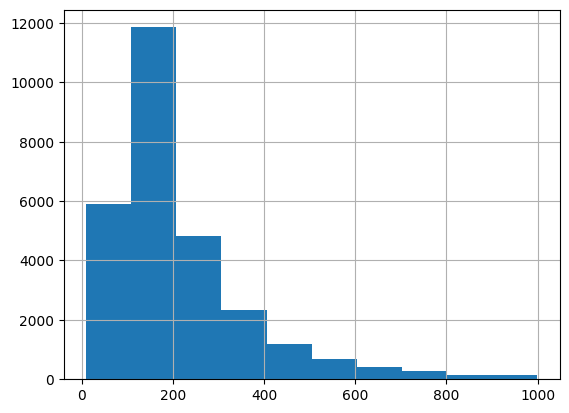

In [ ]:
# vEmos el precio medio de todas las ciudades.
df.price.hist();
# Vemos que la mayoría están por debajo de 400 eur la noche.

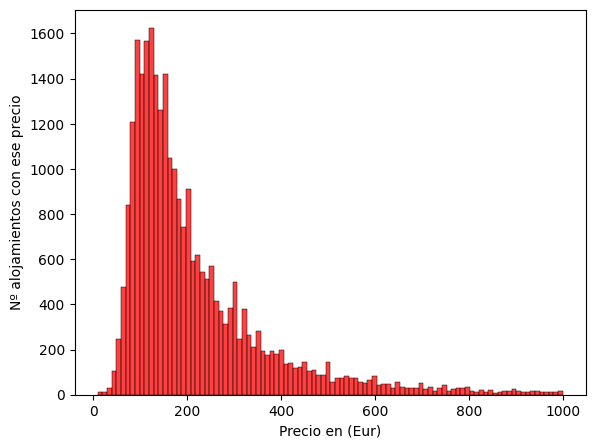

In [ ]:
# Veamoslo con un histograma de mejor calidad.
fig,axs = plt.subplots(1,1,figsize= (6.6,5))
sns.histplot(df["price"],
           
             kde=False,
             color='red',
             bins=100, ax = axs) # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Precio en (Eur)")
axs.set_ylabel("Nº alojamientos con ese precio");


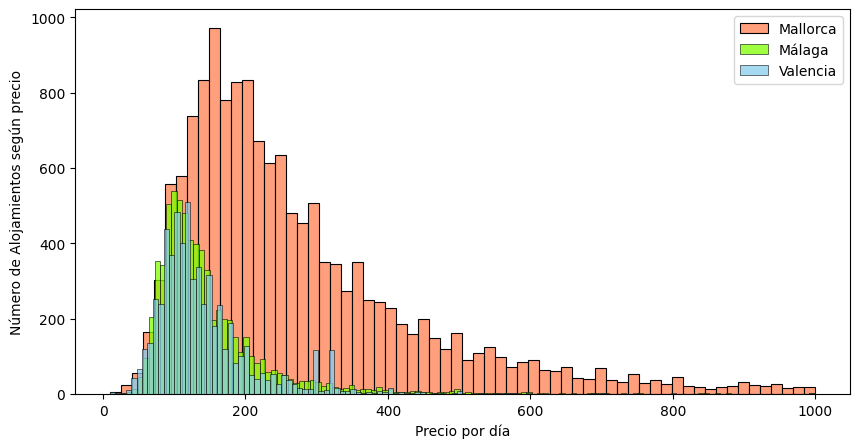

In [ ]:
# Veamos los histogramas de precio por ciudad solapados para ver cuál carga mayores precios en mas alojamientos.
plt.figure(figsize =(10,5))

sns.histplot(x="price", data = df_Mallorca, label ='Mallorca',color="coral")
sns.histplot(x="price", data = df_Malaga, label ='Málaga',color="chartreuse")
sns.histplot(x="price", data = df_Valencia, label ="Valencia",color="skyblue")
plt.ylabel('Número de Alojamientos según precio')
plt.xlabel('Precio por día')
plt.legend();

In [ ]:
# Veamos los principales estadísticos del precio.
# El 75% de los alojamientos tienen precio inferior  a los 241 eur.
# El 50% tienen entre 97 y 241 eur
df.price.describe()

count    27778.000000
mean       216.010044
std        154.238124
min         10.000000
25%        115.000000
50%        165.000000
75%        263.000000
max        999.000000
Name: price, dtype: float64

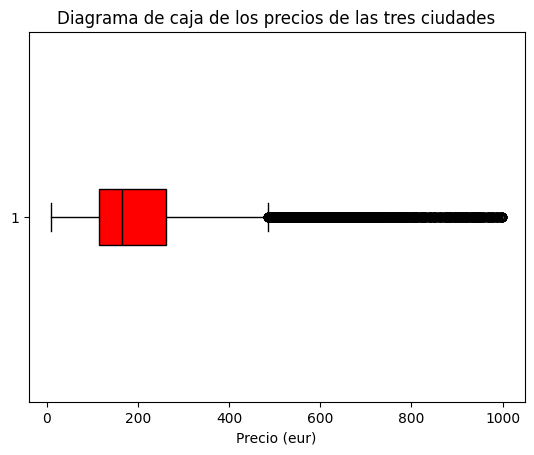

In [ ]:
# Hagamos boxplot de los precios.
box_props = df

plt.boxplot(df['price'],vert = False,boxprops = dict(facecolor = 'red'),medianprops= dict(color = "black"),patch_artist = True)
plt.title("Diagrama de caja de los precios de las tres ciudades")
plt.xlabel('Precio (eur)',size = 10,);


In [ ]:
'''
Los precios es la variable que más nos interesa. 
La media da un valor que nos parece lógico...194 aunque la mediana está algo más baja.
Parece deberse al efecto de algunos precios, que deben ser de propiedades vacacionales de lujo, al tratarse, sobre todo el Mallorca y Malaga de regiones con algunos barrios de lujo.
'''

'\nLos precios es la variable que más nos interesa. \nLa media da un valor que nos parece lógico...194 aunque la mediana está algo más baja.\nParece deberse al efecto de algunos precios, que deben ser de propiedades vacacionales de lujo, al tratarse, sobre todo el Mallorca y Malaga de regiones con algunos barrios de lujo.\n'

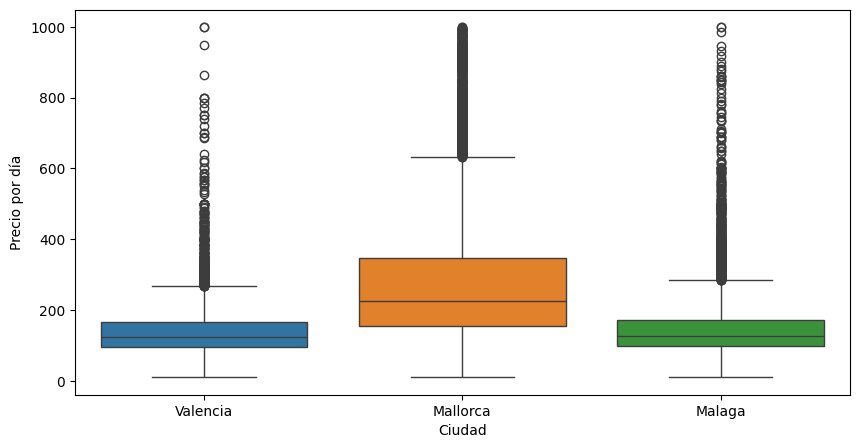

In [ ]:
# Veamos los gráficos caja de precios por ciudad.
plt.figure(figsize=(10,5))
sns.boxplot(x = "City",
            y = "price",
            hue = "City",
            data=df)
plt.ylabel('Precio por día')
plt.xlabel('Ciudad');


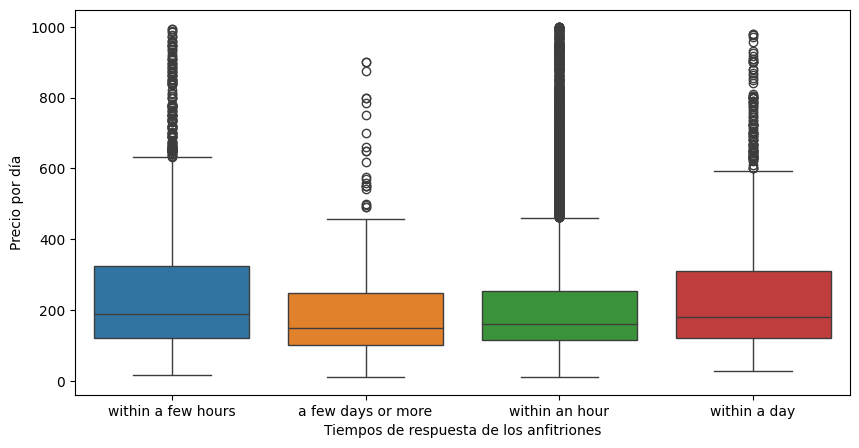

In [ ]:
# Vamos a ver la relación que hay entre los precios y la velocidad de respuesta.
plt.figure(figsize=(10,5))
sns.boxplot(x = "host_response_time",
            y = "price",
            hue = "host_response_time",
            data=df)
plt.ylabel('Precio por día')
plt.xlabel('Tiempos de respuesta de los anfitriones');


# Se observa que los anfitriones que tardan más en contestar muestran un rango intercuartílico más bajo que el resto, con precios menores y muchos menos valores atípicos en la parte alta del precio.
# Los anfitriones que contestan en menos de una hora cargan precios a los clientes con una mayor densidad de valores atípicos de precios altos. Ganan más.
# Parece que para poder cobrar más hay que tener una buena atención al cliente, resolviendo sus dudas y atendiendo sus consultas.

In [ ]:

# Vamos a analizar el número de comentarios de los clientes.
df.number_of_reviews.describe()

count    27778.000000
mean        31.661351
std         61.355229
min          0.000000
25%          1.000000
50%          9.000000
75%         33.000000
max       1665.000000
Name: number_of_reviews, dtype: float64

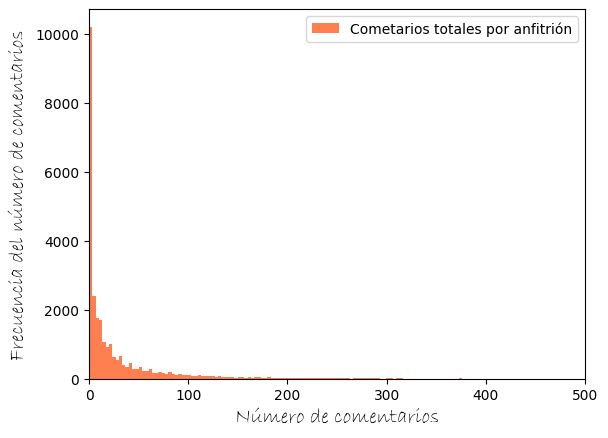

In [ ]:
# Lo vamos a graficar los comentarios con relación al precio.
plt.hist(df['number_of_reviews'],500,color = 'coral',label = 'Cometarios totales por anfitrión',)
plt.legend(loc = 'upper right', )
plt.xlabel('Número de comentarios',fontdict={'family': 'Bradley Hand itc'},size = 15)
plt.ylabel('Frecuencia del número de comentarios',fontdict={'family': 'Bradley Hand itc'},size = 15)
plt.xlim([0,500]);
# Hay muchos hosts con pocos comentarios o ninguno.
# Posiblemente no sea un indicador que nos sirva. 

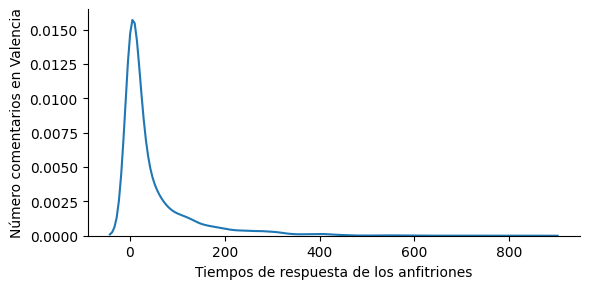

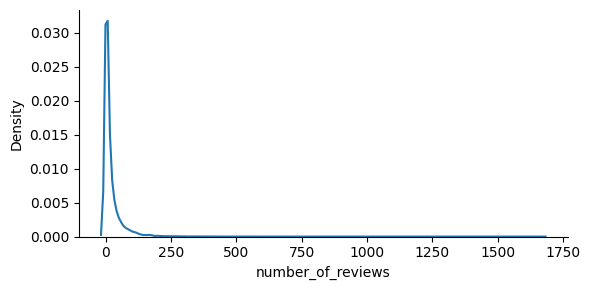

In [ ]:
# Veamoslos con una función de densudad primero una ciudad y luego el total por si lo usamos en la presentación.
fg = sns.displot(x= 'number_of_reviews',data = df_Valencia, kind = 'kde',height = 3, aspect = 2)
plt.ylabel('Número comentarios en Valencia')
plt.xlabel('Tiempos de respuesta de los anfitriones')
fg =sns.displot(x= 'number_of_reviews',data = df_Mallorca, kind = 'kde',height = 3, aspect = 2)
# height controla la altura del gráfico
# Aspect la relación ente ancho/alto

In [ ]:
# Vamos a analizar la puntuación que otorgan los clientes..
df.review_scores_rating.describe()

count    32792.000000
mean         4.673252
std          0.365539
min          1.000000
25%          4.630000
50%          4.680000
75%          4.900000
max          5.000000
Name: review_scores_rating, dtype: float64

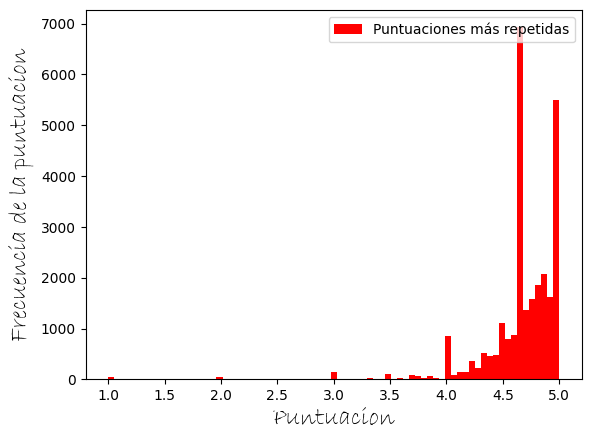

In [ ]:
# Parece que los comentarios totales están muy sesgados, por lo que vamos a probar con reviews_score_rating y reviews_per_month
plt.hist(df['review_scores_rating'],75,color = 'red',label = 'Puntuaciones más repetidas')
plt.legend(loc = 'upper right', )
plt.xlabel('Puntuacion',fontdict={'family': 'Bradley Hand itc'},size = 18)
plt.ylabel('Frecuencia de la puntuacion',fontdict={'family': 'Bradley Hand itc'},size = 18);

# Parece que habría que estar por encima de la media, es decir consgeguir más de un 4.67 en nuestras puntuaciones.

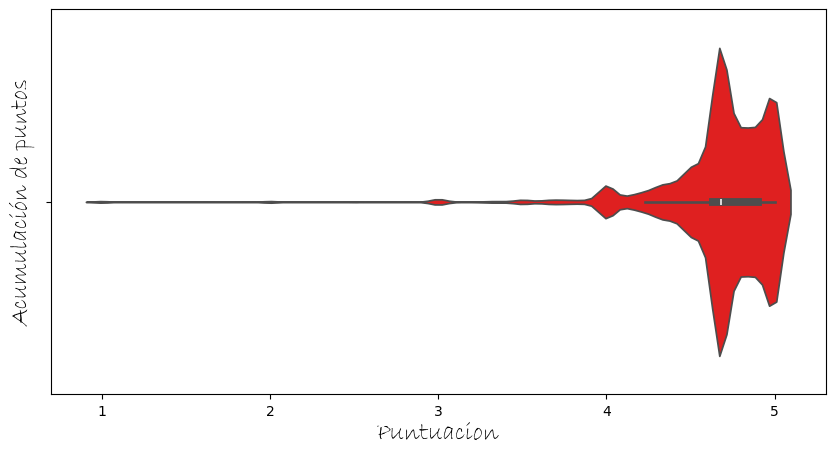

In [ ]:
# VAmos a verlo con un gráfico de violín.
plt.figure(figsize = (10,5))
sns.violinplot(df['review_scores_rating'], color = 'r',orient = 'h')
plt.xlabel('Puntuacion',fontdict={'family': 'Bradley Hand itc'},size = 18)
plt.ylabel('Acumulación de puntos',fontdict={'family': 'Bradley Hand itc'},size = 18);

In [ ]:
df.reviews_per_month.describe()

count    32792.000000
mean         1.251281
std          1.375888
min          0.010000
25%          0.350000
50%          1.020000
75%          1.320000
max         45.000000
Name: reviews_per_month, dtype: float64

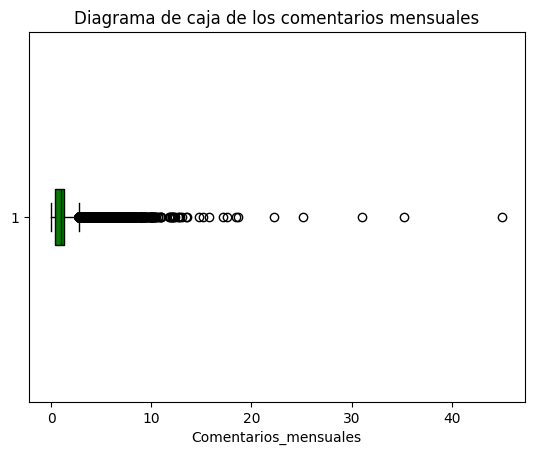

In [ ]:
box_props = df

plt.boxplot(df['reviews_per_month'],vert = False,boxprops = dict(facecolor = 'green'),medianprops= dict(color = "black"),patch_artist = True)
plt.title("Diagrama de caja de los comentarios mensuales")
plt.xlabel('Comentarios_mensuales',size = 10,);

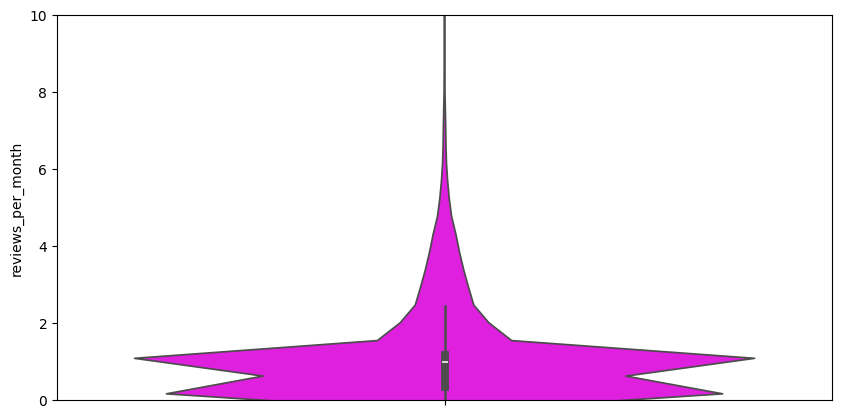

In [ ]:
# VAmos a verlo con un gráfico de violín.
plt.figure(figsize = (10,5))
sns.violinplot(df['reviews_per_month'], color = 'fuchsia')
plt.ylim([0,10]);


In [ ]:
# Vamos a buscar correlaciones entre diferentes variables y el precio.

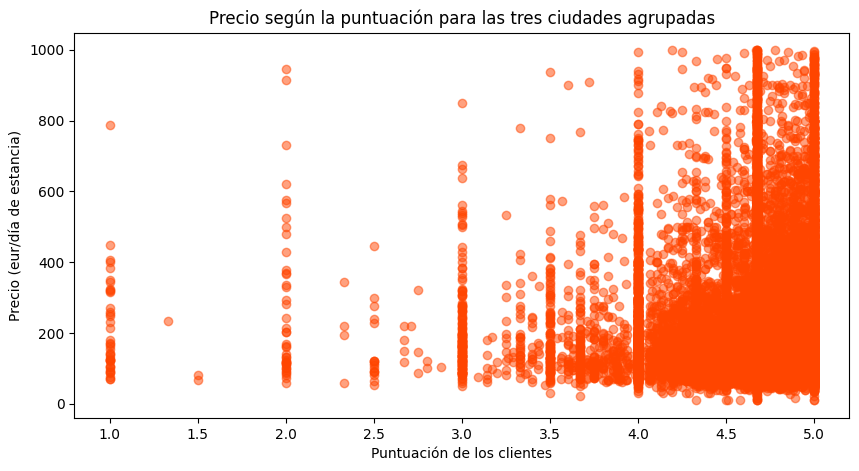

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(df['review_scores_rating'], df['price'], alpha=0.5, c = 'orangered')
plt.xlabel('Puntuación de los clientes',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según la puntuación para las tres ciudades agrupadas");
# Vemos dos cosas. En general los clietnes dan puntuaciones redondas y
#  parece haber una correlación positiva entre el precio y la puntuación de los clientes.

In [ ]:
# Veamoslo con un gráfico de violín
plt.figure(figsize=(8,6))
sns.swarmplot(x='consumo_kg',data=df_viajes, color ='steelblue')

In [ ]:
# Veamos la correlación entre el precio y la puntuación de los clientes
corr_price_review_scores_rating = df['review_scores_rating'].corr(df['price'])

print(round(corr_price_review_scores_rating,2))

# Observamos baja correlación pero positiva.

0.05


In [ ]:
# vamos a ver los estadísticos de las puntuaciones de los clientes.
df.review_scores_rating.describe()

count    32792.000000
mean         4.673252
std          0.365539
min          1.000000
25%          4.630000
50%          4.680000
75%          4.900000
max          5.000000
Name: review_scores_rating, dtype: float64

In [ ]:
# Vamos a ver los estadísticos de las los comentarios de los clientes.
df.reviews_per_month.describe()

count    27778.000000
mean         1.130508
std          1.253032
min          0.010000
25%          0.320000
50%          0.970000
75%          1.160000
max         45.000000
Name: reviews_per_month, dtype: float64

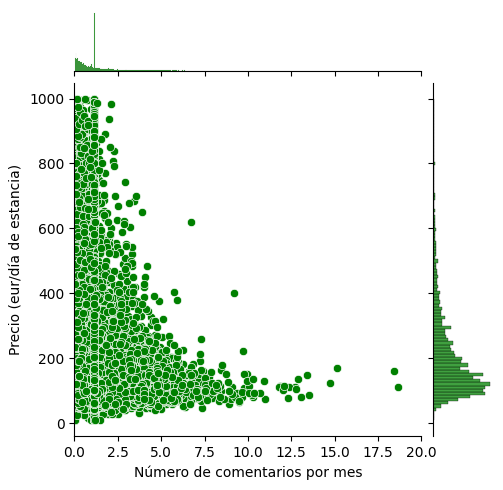

In [ ]:
# vamos a ver el mismo analisis con un gráfico conjunto, por si aporta más información.
sns.jointplot(x = df["reviews_per_month"],
              y = df["price"],
              color = "green",
            height = 5)
plt.xlim([0,20])
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.xlabel('Número de comentarios por mes');

# Parece demostrado que las puntuaciones más altas están relacionadas con mayores precios.
# El objtevio de alcanzar puntuaciones superiores a la media de 4.67 parece claro para aumentar los ingresos.

In [ ]:
# Vamos a trabajar un poco con los alojamientos.ValueError
df.accommodates.describe()

count    32792.000000
mean         4.632959
std          2.491217
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         16.000000
Name: accommodates, dtype: float64

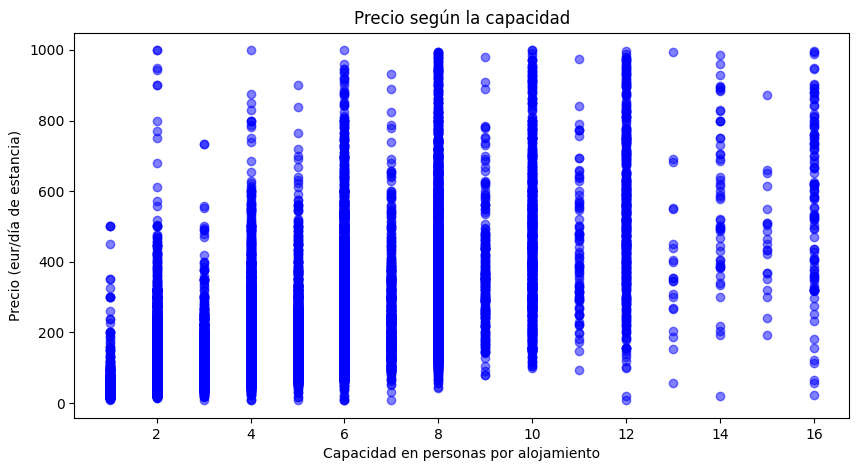

In [ ]:
# Veamos la relación entre precio y capacidad.
fig = plt.figure(figsize=(10,5))
plt.scatter(df['accommodates'], df['price'], alpha=0.5, c = 'blue');
plt.xlabel('Capacidad en personas por alojamiento',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según la capacidad");

# Vemos cierta correlación entre el precio y el número de plazas.
# Si se invierte en más plazas parece verse reflejado en el precio pero no con correlación total.

In [ ]:
# Veamos la correlación entre el precio y la capacidad de las personas por alojamiento
corr_price_accommodates = df['accommodates'].corr(df['price'])

print(round(corr_price_accommodates,2))

# Observamos una correlación de cierta importancia entre el la capacidad y el precio.

0.67


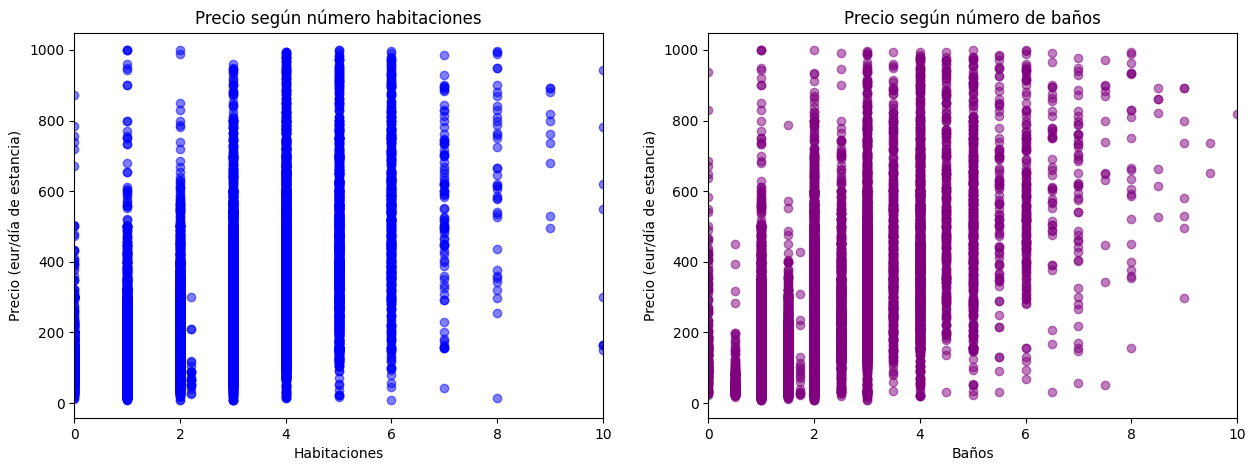

In [ ]:
# Veamos la relación entre precio y habitaciones y de baños.
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1) # una fila, dos columnas, el primero del índice.

plt.scatter(df['bedrooms'], df['price'], alpha=0.5, c = 'blue',);
plt.xlabel('Habitaciones',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según número habitaciones")
plt.xlim([0,10]);

# Veamos la relación entre precio y  baños
plt.subplot(1,2,2) 

plt.scatter(df['bathrooms'], df['price'], alpha=0.5, c = 'purple',);
plt.xlabel('Baños',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según número de baños")
plt.xlim([0,10]);
# Vemos relación positiva pero tampoco parece que invertiendo en más habitaciones el precio a cobrar suba mucho.

# Vemos ralación positiva pero tampoco parece que invertiendo en más baños el precio a cobrar suba mucho.

In [ ]:
# Veamos la correlación entre el precio y el número de habitaciones y de baños.
corr_price_bedrooms = df['bedrooms'].corr(df['price'])
corr_price_bathrooms = df['bathrooms'].corr(df['price'])
print(round(corr_price_bedrooms,2))
print(round(corr_price_bathrooms,2))

# Observamos correlacion positiva importante entre el número de habitaciones y el de baños y el precio.

0.62
0.66


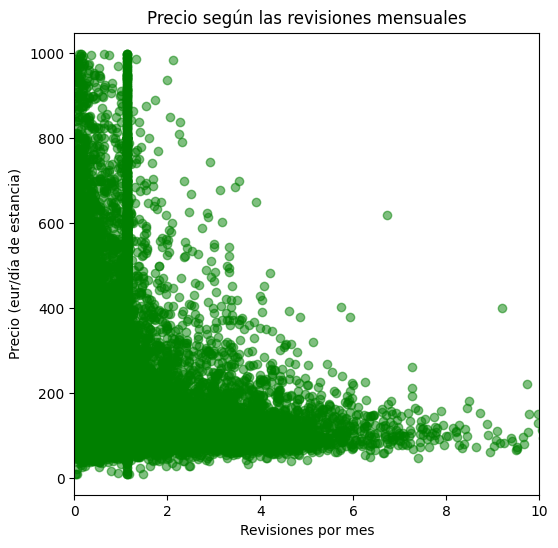

In [ ]:
# Veamos la relación entre el número de revisiones mensuales y el precio.
fig = plt.figure(figsize=(6,6))
plt.scatter(df['reviews_per_month'], df['price'], alpha=0.5, c = 'green');
plt.xlabel('Revisiones por mes',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según las revisiones mensuales")
plt.xlim([0,10]);

# Parece que haya relación inversa,pero analizando los datos pensamos que tienen más revisiones los que más se alquilan que tb serán los que están más cerca del precio medio. 

In [ ]:
corr_price_reviews_per_month = df['price'].corr(df['reviews_per_month'])

print(round(corr_price_reviews_per_month,2))

# Nos da una correlación baja pero negativa... por lo que no parece que las revisiones mensuales estén muy relacionadas con el precio.

-0.23


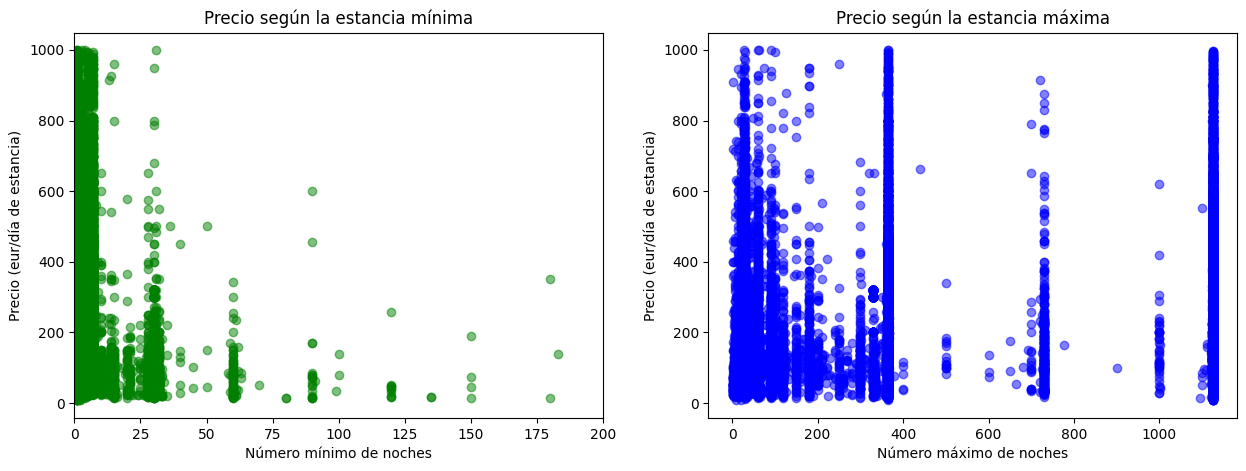

In [ ]:
# Veamos si hay relación visual entre el precio y el número de noches.
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1) # dos filas, dos columnas, el primero del índice.
plt.scatter(df['minimum_nights'], df['price'], alpha=0.5, c = 'green')
plt.xlabel('Número mínimo de noches',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según la estancia mínima")
plt.xlim([0,200]);
plt.subplot(1,2,2) # dos filas, dos columnas, el segundo del índice.
plt.scatter(df['maximum_nights'], df['price'], alpha=0.5, c = 'blue')
plt.xlabel('Número máximo de noches',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según la estancia máxima");

In [ ]:
# Veamos la correlación entre el precio y  las estancias mínima y máxima.
corr_price_minimum_nights = df['minimum_nights'].corr(df['price'])
corr_price_maximum_nights = df['maximum_nights'].corr(df['price'])
print(round(corr_price_minimum_nights,2))
print(round(corr_price_maximum_nights,2))


# Vemos que la correlación entre prcecio y número mínimo de noches es baja e incluso algo negativa. Aumentar el número mínimo de noches no mejora el precio.
# La correlación entre el número máximo de noches y el precio es algo mayor y positiva, pero aun así es muy baja. Aumentar el número máximo de noches puede mejorar algo el precio, pero en muy poco.

-0.05
0.11


In [ ]:
# Vamos a analizar dos variables categóricas que nos interesan mucho,
# si el anfitrión es "superhost" (host_is_superhost) y el tiempo de restpuesta del anfitrión (host_response_time)	

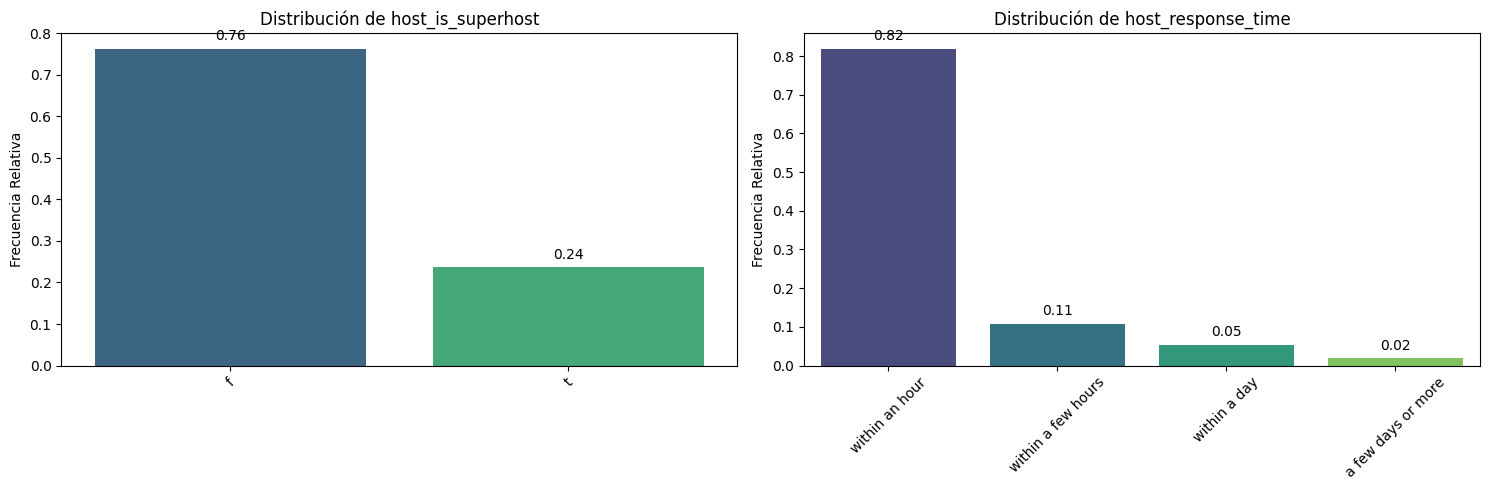

In [ ]:
pinta_distribucion_categoricas(df,["host_is_superhost","host_response_time"], relativa= True, mostrar_valores= True)
# Resultados sencillos pero interesantes, parece que el 75% no son superhosts pero la mayoría responden en menos de una hora....

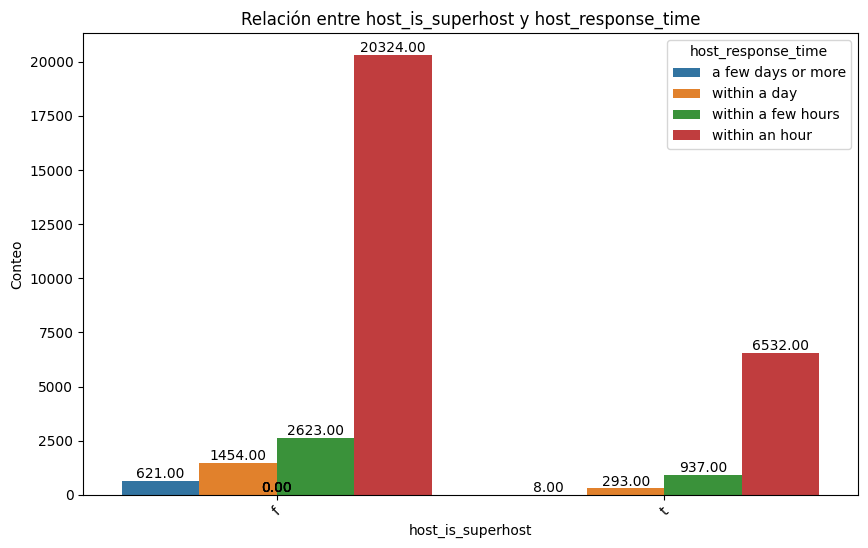

In [ ]:
# Veamos ahora la relación entre ser superhost y contestar rápido a los clientes  en valores absolutos.
plot_categorical_relationship_fin(df, "host_is_superhost","host_response_time", show_values= True)

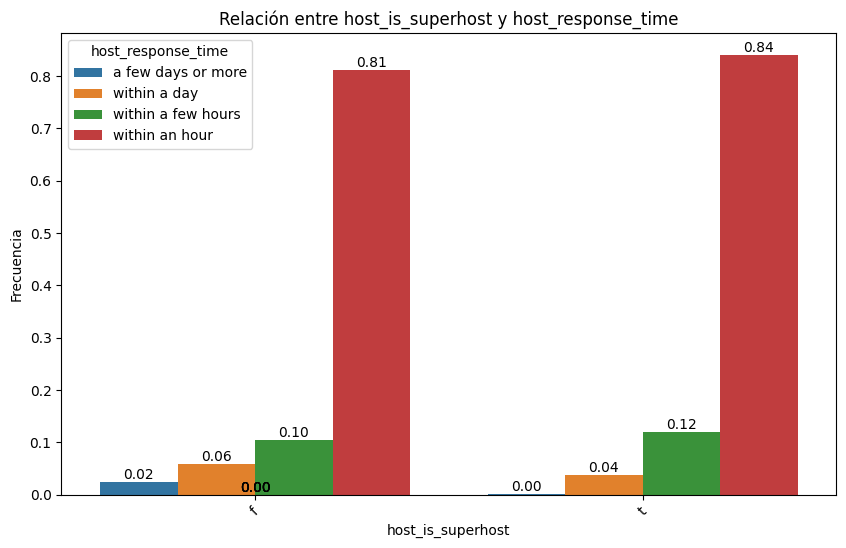

In [ ]:
# En valores relativos. 
plot_categorical_relationship_fin(df, "host_is_superhost","host_response_time", relative_freq = True, show_values= True)
# Esto nos dice que no parece que los superhost contesten antes que el resto, solo un 3% más lo hace en menos de una hora.

In [ ]:
# Calcular la media de los precios de los anfitriones que cumplen la condición
filtro = df['host_is_superhost'] == "t"
media_precio_superhost = df[filtro]['price'].mean()
print(round(media_precio_superhost))

filtro = df['host_is_superhost'] == "f"
media_precio_no_superhost = df[filtro]['price'].mean()
print(round(media_precio_no_superhost))
#Paradójicamente no parece que los superhost cobren más por día. 


182
199


In [ ]:
# Calcular la media de los precios de los anfitriones que cumplen la condición
filtro = df['host_is_superhost'] == "t"
media_precio_superhost = df[filtro]['price'].mean()
media_habitaciones_superhost = df[filtro]['bedrooms'].mean()
rentabilidad_habitacion_superhost = media_precio_superhost/media_habitaciones_superhost
print(round(rentabilidad_habitacion_superhost,0))

filtro = df['host_is_superhost'] == "f"
media_precio_no_superhost = df[filtro]['price'].mean()
media_habitaciones_no_superhost = df[filtro]['bedrooms'].mean()
rentabilidad_habitacion_no_superhost = media_precio_no_superhost/media_habitaciones_no_superhost
print(round(rentabilidad_habitacion_no_superhost,0))
# Los superhosts tienen una rentabilida por habitación más alta.

91.0
87.0


In [ ]:
# Calcular la media de los precios de los anfitriones que cumplen la condición
filtro = df['host_is_superhost'] == "t"
media_precio_superhost = df[filtro]['price'].mean()
media_camas_superhost = df[filtro]['beds'].mean()
rentabilidad_cama_superhost = media_precio_superhost/media_camas_superhost
print(round(rentabilidad_cama_superhost,0))

filtro_2 = df['host_is_superhost'] == "f"
media_precio_no_superhost = df[filtro_2]['price'].mean()
media_camas_no_superhost = df[filtro_2]['beds'].mean()
rentabilidad_cama_no_superhost = media_precio_no_superhost/media_camas_no_superhost
print(round(rentabilidad_cama_no_superhost,0))
# Los superhosts tienen una rentabilida por cacma mucho más alta.

65.0
62.0


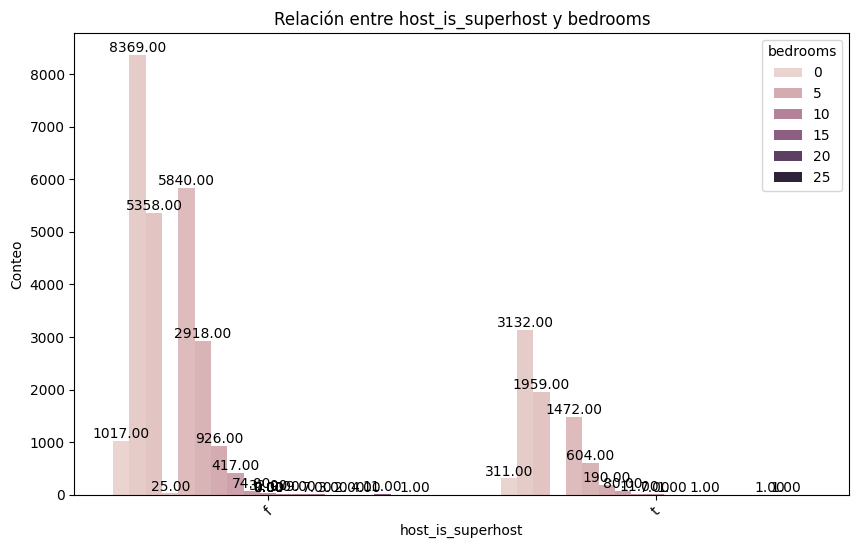

In [ ]:
# Veamos la relación entre número de habitaciones y ser superhost o no.
plot_categorical_relationship_fin(df, "host_is_superhost","bedrooms", relative_freq = False, show_values= True)
# Parece que los no superhost tienen menor numero de habitaciones.

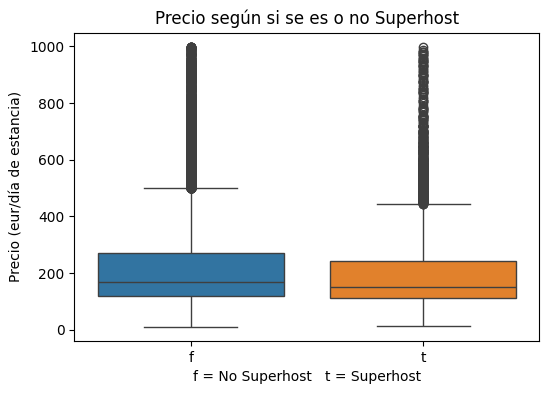

In [ ]:
# Veamos la correlación entre el precio y si el cliente es superhost o no.
plt.figure(figsize=(6,4))
sns.boxplot(x = "host_is_superhost",
            y = "price",
            hue = "host_is_superhost",
            data=df)
plt.xlabel('f = No Superhost   t = Superhost',size = 10)
plt.ylabel('Precio (eur/día de estancia)',size = 10)
plt.title("Precio según si se es o no Superhost");

# No parece que los superhost cobren precios más altos.

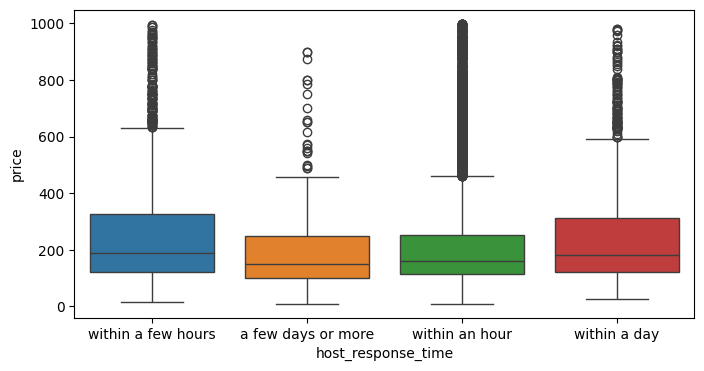

In [ ]:
# Veamos la correlación entre el precio y el tiempo de respuesta.
plt.figure(figsize=(8,4))
sns.boxplot(x = "host_response_time",
            y = "price",
            hue = "host_response_time",
            data=df);

# No parece que los superhost cobren precios más altos.